In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import copy

In [40]:
data, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.5, random_state=10)

In [41]:
data[:5]

array([[  4.14012909, -10.13137814],
       [  2.19434518,   2.78395719],
       [ -0.01132247,  -6.32354361],
       [  0.20315879,  -3.81681749],
       [  1.1222706 ,   5.99614545]])

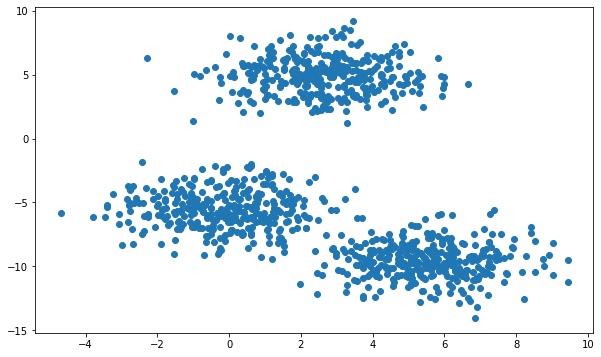

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

### 1. Assign k random centroids

In [43]:
k = 3
centroid_x = np.random.randint(np.min(data), np.max(data), size=k)
centroid_y = np.random.randint(np.min(data), np.max(data), size=k)

In [44]:
centroids = np.array(list(zip(centroid_x, centroid_y)))

In [45]:
centroids

array([[  4, -14],
       [ -1, -14],
       [  4,  -9]])

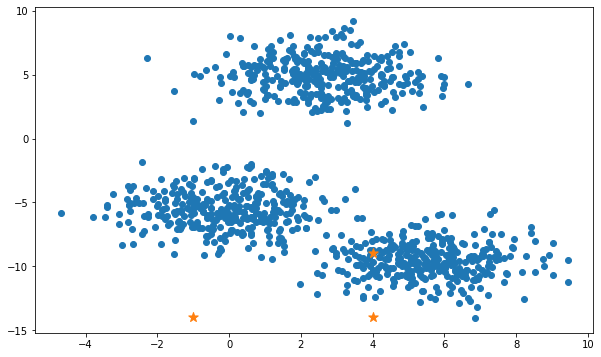

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centroid_x, centroid_y, s=100, marker='*')
plt.show()

In [47]:
def euclidean_dist(a,b,axis=1):
    return np.linalg.norm(a - b, axis=axis)

In [48]:
centroids_old = np.zeros_like(centroids)

In [49]:
centroids_old

array([[0, 0],
       [0, 0],
       [0, 0]])

In [50]:
clusters = np.zeros(len(data))

In [51]:
# clusters

In [52]:
error = euclidean_dist(centroids, centroids_old, axis=None)

In [53]:
error

22.494443758403985

In [54]:
def plotData(clusters, centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0], points[:,1],s=10,c=colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='purple')
    plt.show()

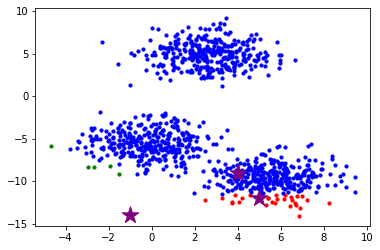

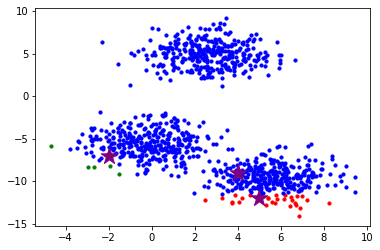

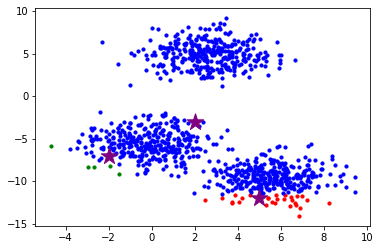

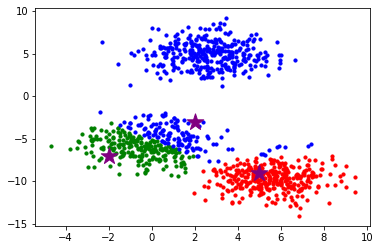

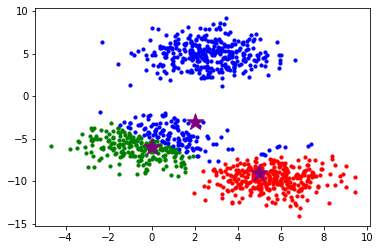

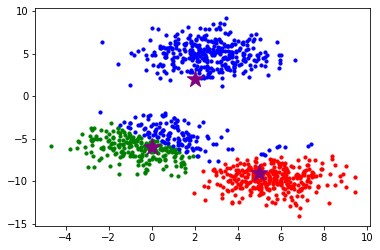

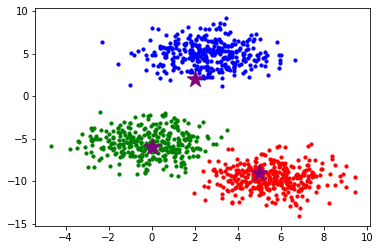

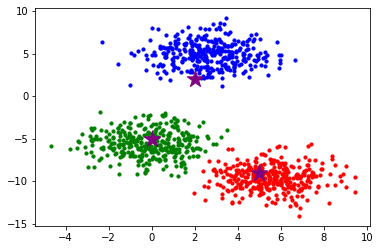

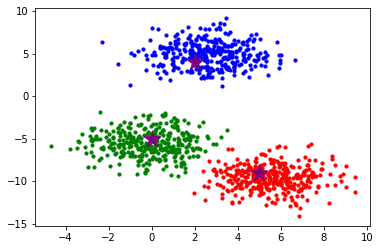

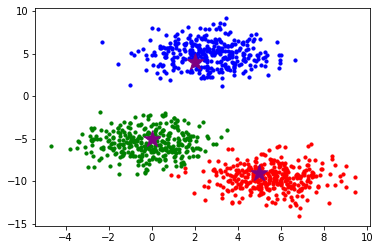

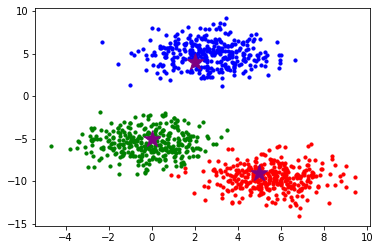

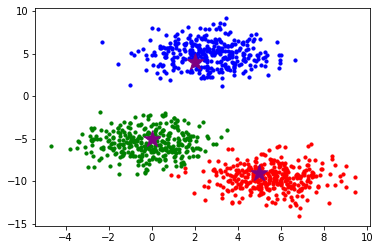

In [55]:
while error != 0:
    for i in range(len(data)):
        distances = euclidean_dist(data[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    centroids_old = copy.deepcopy(centroids)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
        plotData(clusters, centroids)
    error = euclidean_dist(centroids, centroids_old, axis=None)

In [56]:
clusters

array([0., 2., 1., 1., 2., 1., 1., 1., 1., 1., 0., 2., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 2., 2., 0., 2., 2., 2., 1., 2., 2., 0., 2., 1., 1., 0., 0., 0.,
       1., 2., 1., 2., 1., 1., 0., 2., 2., 1., 1., 0., 2., 1., 0., 2., 1.,
       2., 2., 2., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 2., 1., 2.,
       0., 2., 1., 1., 2., 2., 0., 0., 2., 1., 0., 2., 0., 0., 2., 2., 1.,
       2., 2., 1., 0., 1., 2., 0., 1., 1., 2., 0., 2., 1., 0., 2., 1., 1.,
       2., 0., 0., 0., 0., 0., 0., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1.,
       1., 0., 1., 1., 0., 2., 1., 0., 2., 0., 1., 2., 2., 1., 2., 0., 0.,
       1., 0., 2., 1., 1., 2., 1., 2., 1., 0., 0., 2., 2., 2., 2., 0., 1.,
       2., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 2., 2., 1.,
       1., 1., 2., 1., 1., 0., 0., 2., 0., 2., 2., 1., 1., 1., 0., 2., 1.,
       0., 0., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 0., 2., 1., 2.,
       1., 0., 0., 1., 2.